In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Import data
Nx = 512
Ny = 512
data = np.fromfile('sw_output.data', np.float32).reshape((-1, Nx, Ny))

In [6]:
# Define number of time steps
NT = len(data[:,1,1])

# Extract time and a grid-slice
N_iter = 1000
data_period = 100
dt = 0.05
times = np.arange(0, N_iter*0.05, data_period*0.05)

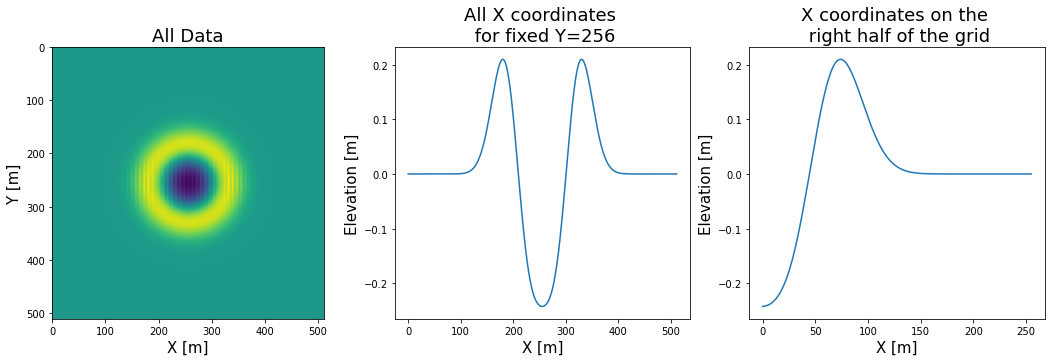

In [16]:
fig, ax = plt.subplots(ncols=3, figsize=(18,5)) 

# Define time step that we are looking at 
t_idx = 5-1

# Plot the whole grid
ax[0].imshow(data[t_idx,:,:])
ax[0].set_title(f'All Data', fontsize=18)
ax[0].set_xlabel('X [m]', fontsize=15)
ax[0].set_ylabel('Y [m]', fontsize=15)

# Plot the y-slice
ax[1].plot(data[t_idx,:,256])
ax[1].set_title(f'All X coordinates \n for fixed Y={256}', fontsize=18)
ax[1].set_xlabel('X [m]', fontsize=15)
ax[1].set_ylabel('Elevation [m]', fontsize=15)

# Plot the side of x chosen
ax[2].plot(data[t_idx,256:,256])
ax[2].set_title(f'X coordinates on the \n right half of the grid', fontsize=18)
ax[2].set_xlabel('X [m]', fontsize=15)
ax[2].set_ylabel('Elevation [m]', fontsize=15)

plt.show()

In [28]:
# Empty array to store the position of the max elevation in
max_x = np.ones(NT)

# Loop over the time steps and save the position of the highest elevation 
# We use argmax directly to symbolize position since it is the change in position that is important for the assignment
# The positions themselves are rather arbritrary
for i in range(len(max_x)):
    max_x[i] = np.argmax(data[i,256:,int(Nx/2)-1])

In [29]:
# Make a linear fit to the data (except the first 2 points) to find the phase speed
def func(x, a,b):
    return a*x + b

# Fit
popt, pcov = curve_fit(func, times[2:], max_x[2:])
print(f'the phase speed found is: {popt[0]}')

the phase speed found is: 3.238095230991961


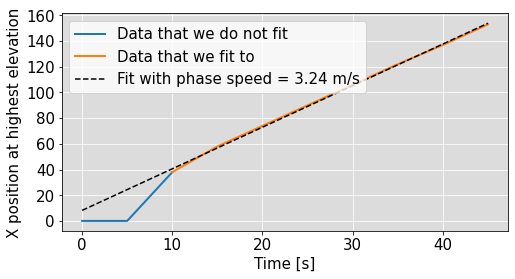

In [44]:
fig, ax = plt.subplots(figsize=(8,4))

ax.set_facecolor('gainsboro')
ax.grid(color='white')

ax.plot(times[:3], max_x[:3], linewidth=2, zorder=2, label='Data that we do not fit')
ax.plot(times[2:],max_x[2:], linewidth=2, zorder=2, label='Data that we fit to')

# Plot fot
ax.plot(times, func(times, *popt), linestyle='dashed', color='k', label=f'Fit with phase speed = {popt[0]:.2f} m/s')

ax.legend(prop={'size':15}, loc='upper left')
ax.set_xlabel('Time [s]',fontsize=15)
ax.set_ylabel('X position at highest elevation',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()

In [45]:
# Percentage of
np.abs(3.12 - 3.24) / 3.12

0.03846153846153849